# Monte Carlo: Estimating $\pi$

Notebook structure: 
- What is MC (figure out explanation of why it traverses the probability distribution well)
- Explain how we can use this to find pi (explain that we do a trivial example first) maths exercise
- Now write the naive function to calculate an estimate for `n_samples`
- Now vectorise this function -> show the speed differences (introduction to *magic functions*)
- Show that we can do the same for a spher section (what are the convergence properties for this?

The essence of Monte Carlo is to take repeated samples (in this case from a probability distribution to obtain numerical results. Often times the randomness of the Monte Carlo method is used for problems that are deterministic in principle. The origins of the name comes from the code name to secret works of von-Neumann and Ulam in the second world war.

![title](figs/pi_estimate.gif)

Our first example is the *Hello World* of Monte Carlo where we will estimate $\pi$ by picking numbers from a 2D uniform distribution. Here the analytic solution is easy to solve so it serves as an intutibe example as we see our estimate converge towards $\pi$. The animation above shows the main idea of uniformally picking points from in a 1x1 grid and then see whether these points would lie in a quarter-circle. From this we can estimate $\pi$.

## The estimator, $\hat \pi$

The equation of a circle is $x^2 + y^2 = 1$ therefore if $x_0^2 + y_0^2 < 1$ the point $(x_0, y_0)$ lies within the circle. Therefore if we have $N_\text{tot}$ samples, we will get a subset $N_\text{circ}$ which lie within the circle. Since the samples are uniform, on expectation the ratio $E[N_\text{circ} / N_\text{tot}] = A_\text{circ} / A_\text{tot}$ where the $A$'s are the areas. 

$$ E\left[\frac{N_\text{circ}}{N_\text{tot}}\right] = \frac{A_\text{circ}}{A_\text{tot}} = \frac{\hat \pi \cdot 1^1 /4}{1^2} = \frac \pi 4 $$

Taking away the expectation and changing the analyic value of $\pi$ to our estimator $\hat \pi$:

$$ \frac{N_\text{circ}}{N_\text{tot}} =  \frac {\hat \pi}{4} $$

$$\hat \pi = 4 \cdot  \frac{N_\text{circ}}{N_\text{tot}}$$

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import gamma

### Exercise: Constructing a naive estimator

The first task is to construct a naive estimator but sequentially picking random points and keeping a running total of the number of these points which lie within the circle then using this to estimate $\pi$. The beauty of a simple problem like this is that we know the value we are aiming for $ \pi = 3.141\cdots$ so you should test our your estimator for different values of $n_samples$ n.b. that convergence is quite slow so you need a few hundred samples before you start to get good estimates. 

In [2]:
def estimate_pi_naive(n_samples: int) -> float:
    '''
    YOUR CODE HERE! 

    hint: check the docs for `np.random.uniform()`
    '''

    n_circ = 0

    for _ in range(n_samples):
        # generate coords
        x = np.random.uniform(0,1)
        y = np.random.uniform(0,1)

        if x**2 + y**2 < 1:
            n_circ += 1

    estimate = 4 * n_circ / n_samples

    return estimate

In [3]:
estimate_pi_naive(n_samples=10000)

3.146

### Exercise: Constructing a vectorised estimator

Now having constructed an estimator by sequentially picking points we can construct a more efficient estimator. This is done via picking all the points at once and then checking them all at once too. This is done using `numpy`

In [4]:
def estimate_pi_vectorised(n_samples: int) -> float:
    '''
    YOUR CODE HERE!

    hint: use `np.where()`
    '''

    x = np.random.uniform(0,1,n_samples)
    y = np.random.uniform(0,1,n_samples)

    hit_list = np.where(x**2 + y**2 < 1, 1, 0)
    estimate = 4 * sum(hit_list) / n_samples

    return estimate

In [5]:
estimate_pi_vectorised(n_samples=10000)

3.1416

Now lets see the how the two different ways of writing this estimate differ in their time performance using the *magic function* `%timeit`. This type of function is only available in Jupyter notebooks.

Our vectorised functions should run about ~10x quicker here as the for loops in the vectorised version are run implicitly in a quicker compiled language, C.

In [6]:
n_samples = int(1e6) # one million samples

%timeit estimate_pi_naive(n_samples)
%timeit estimate_pi_vectorised(n_samples)

2.21 s ± 6.87 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
49.2 ms ± 324 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


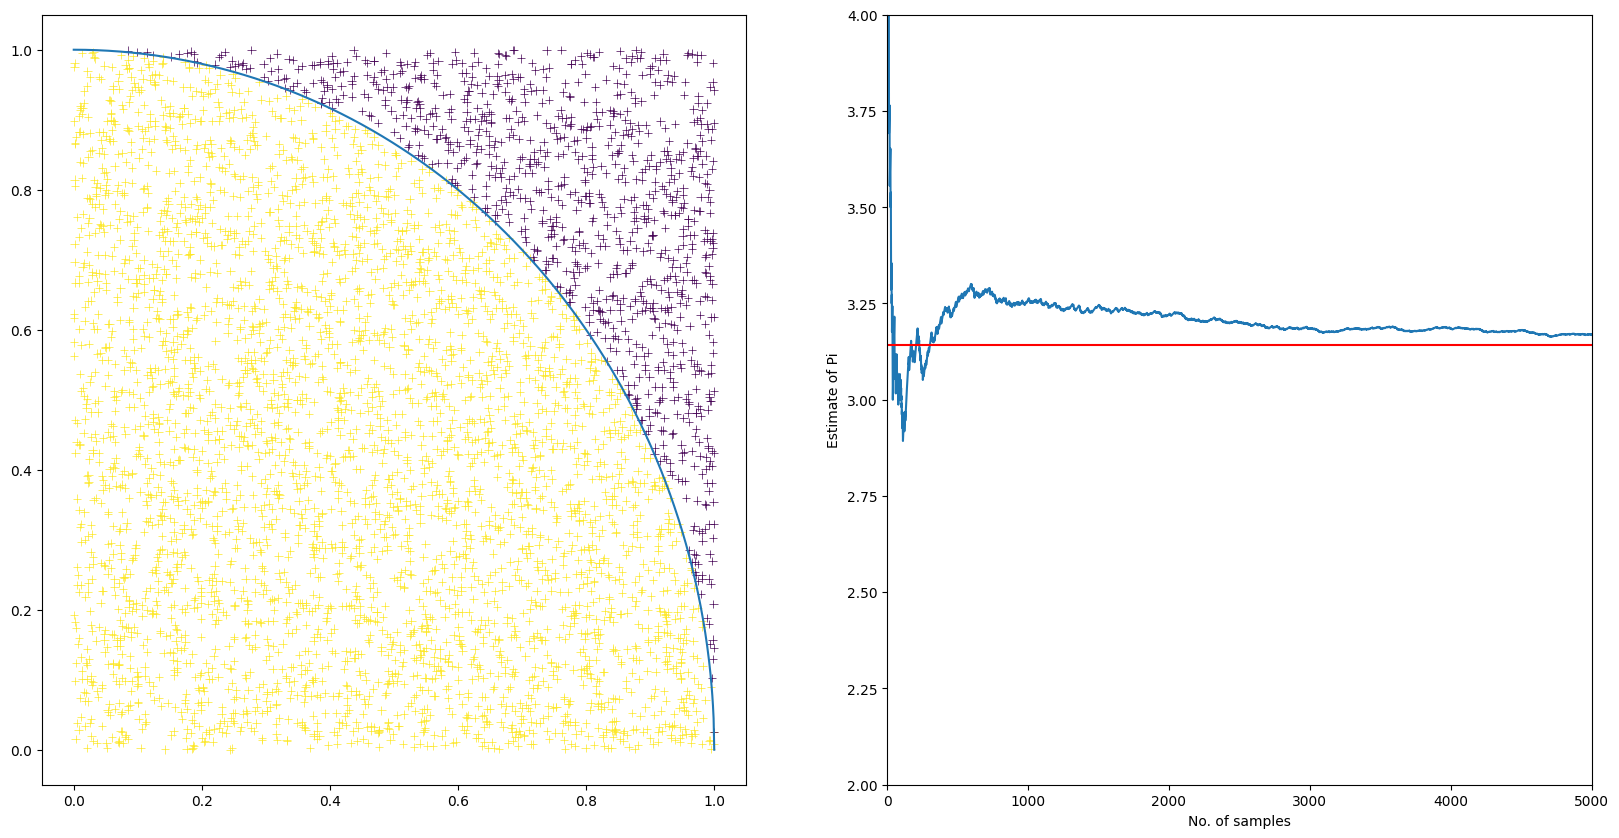

In [7]:
# create circle 
x_circ = np.linspace(0,1,1000)
y_circ = np.sqrt(1 - x_circ**2)

# create random points
n_samples = 5000
x = np.random.uniform(0,1,n_samples)
y = np.random.uniform(0,1,n_samples)
hit_list = np.where(x**2 + y**2 < 1, 1, 0)

# for i in range(n_samples):
# do the animation by slicing the hitlist etc.
# should we do a circle or quarter circle
    
fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(20) # probably a nicer way to do this 
fig.set_figheight(10) # probably a nicer way to do this
# fig.set_title('Estimating pi using Monte Carlo')

# plt.vline() figure out syntax 
ax1.plot(x_circ, y_circ)
ax1.scatter(x,y, c=hit_list, marker='+', linewidths=0.5)

# plot running total
cum_samples = np.arange(1, n_samples + 1)
cum_estimate = 4 * np.cumsum(hit_list) / cum_samples
ax2.plot(cum_samples, cum_estimate)
ax2.axhline(np.pi, c='r')
ax2.set_ylim(2,4)
ax2.set_xlim(0,n_samples)
ax2.set_xlabel("No. of samples")
ax2.set_ylabel("Estimate of Pi")
plt.show()

KeyboardInterrupt: 

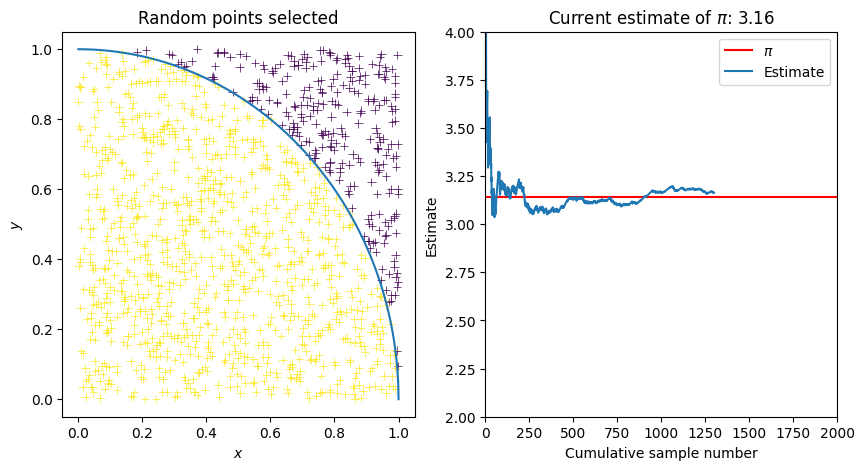

In [537]:
# to create gif - not for the notebook
import matplotlib.animation as animation

n_samples = 2000
points_per_frame = 20

# generate points
x = np.random.uniform(0,1,n_samples)
y = np.random.uniform(0,1,n_samples)
hit_list = np.where(x**2 + y**2 < 1, 1, 0)

fig, (ax1, ax2) = plt.subplots(1,2)
fig.set_figwidth(10) # probably a nicer way to do this 
fig.set_figheight(5) # probably a nicer way to do this

# create circle 
x_circ = np.linspace(0,1,1000)
y_circ = np.sqrt(1 - x_circ**2)
ax1.plot(x_circ, y_circ)

points_per_frame = 20

def update(i):

    frame = i*points_per_frame
    # Update the scatter plot in ax1
    ax1.clear()
    ax1.plot(x_circ, y_circ)
    ax1.scatter(
        x[:frame], 
        y[:frame], 
        c=hit_list[:frame], 
        marker='+', 
        linewidths=0.5, 
    )
    ax1.set_xlabel('$x$')
    ax1.set_ylabel('$y$')
    ax1.set_title('Random points selected')
    

    # Calculate cumulative estimates for ax2
    cum_samples = np.arange(1, frame + 1)
    cum_estimate = 4 * np.cumsum(hit_list[:frame]) / cum_samples

    curr_estimate = cum_estimate[-1] if len(cum_estimate) != 0 else 0

    # Update the line plot in ax2
    ax2.clear()  # Clear the previous line plot
    ax2.axhline(np.pi, c='r', label=r'$\pi$')
    ax2.set_ylim(2,4)
    ax2.set_xlim(0,n_samples)
    ax2.set_title(r'Current estimate of $\pi$: {:.2f}'.format(curr_estimate)) # need to round this 
    ax2.set_xlabel('Cumulative sample number') # think about the naming of this 
    ax2.set_ylabel('Estimate')
    ax2.plot(cum_samples, cum_estimate, label='Estimate')
    ax2.legend()


ani = animation.FuncAnimation(fig, update, frames=n_samples//points_per_frame, interval=100, repeat=False)

writergif = animation.PillowWriter(fps=30)
ani.save('figs/pi_estimate.gif',writer=writergif)

2l/pi = n_hit / n_tot

In [9]:
def buffon_estimate(n_samples, l=0.2):
    '''
    simple example where we are just considering half a track
    '''

    d = np.random.uniform(low=0, high=0.5, size=n_samples) 
    theta = np.random.uniform(low=0, high=np.pi/2, size=n_samples) 

    hit_list = np.where(d + 0.5 * l * np.sin(theta) > 0.5, 1, 0)

    return 2 * l * n_samples / sum(hit_list)

In [10]:
n_samples = int(100000)
l=5/6
buffon_estimate(n_samples, l=l)
estimate_pi_vectorised(n_samples)

3.14644

### Extension - Changing dimension
To further investigate this problem we can look at how the variance of our estimator changes as we perform this experiment in different dimensions. Does generating points in 3D and calculating intersections with a sphere give higher or lower variance? We have quoted some results for volumes of spheres in arbitrary dimension $d$.

$$ V_s/V_t ={\frac {\pi ^{d/2}}{\Gamma {\bigl (}{\tfrac {d}{2}}+1{\bigr )}}}$$

$$ N_s/N_t={\frac {\hat \pi_d ^{d/2}}{\Gamma {\bigl (}{\tfrac {d}{2}}+1{\bigr )}}}$$

$$ \hat \pi_d = \left ( \Gamma(\frac d 2+1) \cdot N_s/N_t \right )^{2/d}$$

$$\mathrm{Var}(\hat \pi_{d,n}) = \frac{\left ( \Gamma(\frac d 2+1) \cdot N_s/N_t \right )^{2/d} - \pi^2}{n}$$

$$\mathrm{Var}(\hat \pi_{2,n}) = E[\hat \pi^2] - E[\hat \pi]^2 = \frac{\left ( 4 \pi - \pi^2 \right )}{n}$$

In [637]:
def estimate_pi(n_samples: int, dim: int) -> float:

    points = np.random.random((dim, n_samples))

    r = np.linalg.norm(points, axis=0)**2

    hit_list = np.where(r < 1, 1, 0)
    
    estimate = (gamma(dim/2+1) * sum(hit_list) / n_samples)**(2/dim)

    return 4 * estimate

In [639]:
def estimate_var(n_samples: int, dim: int, m_estimates: int) -> float:

    pi_hats = np.zeros(m_estimates)

    for i in range(m_estimates): 
    
        pi_hats[i] = estimate_pi(n_samples, dim)

    return pi_hats.var()

In [690]:
n_samples = int(1e5)
m_estimates = 100
dims = np.arange(2,10)
vars = np.zeros(len(dims))

for i, dim in tqdm(enumerate(dims)):

    vars[i] = estimate_var(n_samples, dim, m_estimates)

8it [00:05,  1.60it/s]


In [678]:
def vars_analytic(dims: int, n_samples: int) -> float:

    return (gamma(dim/2+1)**(4/dim - 1) * np.pi**(dim/2) - np.pi**2)/n_samples

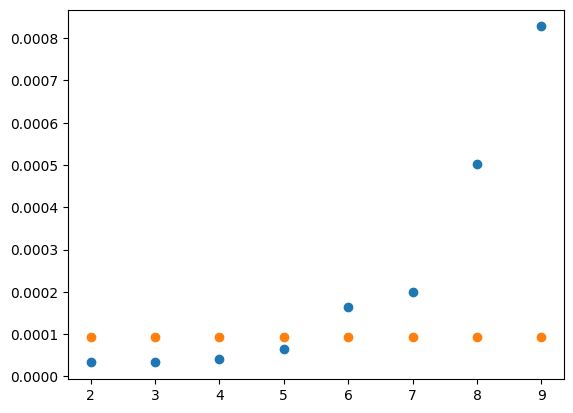

In [691]:
plt.scatter(dims, vars)
v = [vars_analytic(dim, n_samples) for dim in dims]
plt.scatter(dims, v)